# Prediction using Supervised ML

Predict the percentage of marks of the students based on the number of hours they studied

Author -Harshad Saindane

In [3]:
# Import the Warining 
import warnings
warnings.filterwarnings("ignore")

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
# Reading the Data from
data = pd.read_csv ('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
# it show the infromation of Data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#shap of data File 
print (data.shape)

(25, 2)


In [7]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Observation:

    1.describe function is used to get a descriptive statistics summary of a given dataframe.

    2.This includes mean, count, std deviation, percentiles, and min-max values of all the feature

In [6]:
# checking the is their any missing Value in file before the Data Analysis.
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Observation :
    1. There is no any null Value in data set 

# Data Visualization 

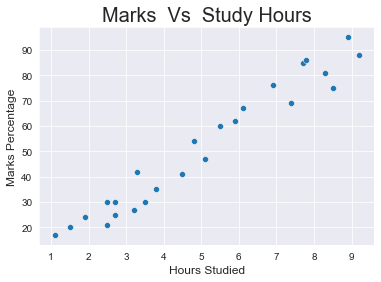

In [9]:
sns.set_style('darkgrid')
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks  Vs  Study Hours',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

# Observation:
    1.From the above scatter plot there looks to be correlation between the 'Marks Percentage' and 'Hours Studied'. 
    
    2.Lets plot a Regression line to confirm the correlation.

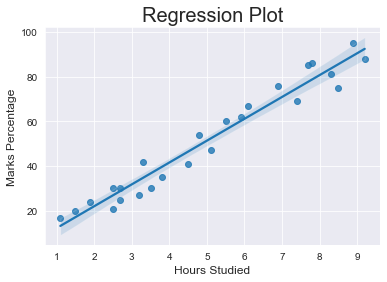

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [10]:
# Regression Plot 
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression Plot',size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()
print(data.corr())

# Observation:
    1.It is confirmed that the variables are positively correlated.

In [16]:
X = data.drop(["Scores"] , axis = 1)
Y = data["Scores"]

In [17]:
# Houres 
X

,Hours
0,2.5
1,5.1
2,3.2
3,8.5
4,3.5
5,1.5
6,9.2
7,5.5
8,8.3
9,2.7


In [18]:
#score 
Y

0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64

In [33]:
# Spliting the Data in two
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2 ,random_state = 0)

In [34]:
# Model Traning 
regression = LinearRegression()
regression.fit(train_X, train_Y)
print("---------Model Trained---------")

---------Model Trained---------


In [35]:
print(regression.coef_,regression.intercept_)

[9.91065648] 2.018160041434683


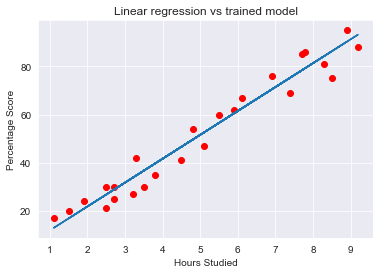

In [36]:
line = regression.coef_*X+regression.intercept_
plt.title("Linear regression vs trained model")
plt.scatter(X,Y,color='red')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.plot(X,line)
plt.show()

In [37]:
print(test_X)
Y_pred = regression.predict(test_X)

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


# Comparing the actual value to the Predicted value

In [40]:
df = pd.DataFrame({'Actual value':test_Y, 'Predicted value':Y_pred})
df

,Actual value,Predicted value
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [43]:
#check the accuracy scores for training and test set
print("Training Score ",regression.score(train_X,train_Y))
print("Testing Score ",regression.score(test_X,test_Y))

Training Score  0.9515510725211552
Testing Score  0.9454906892105356


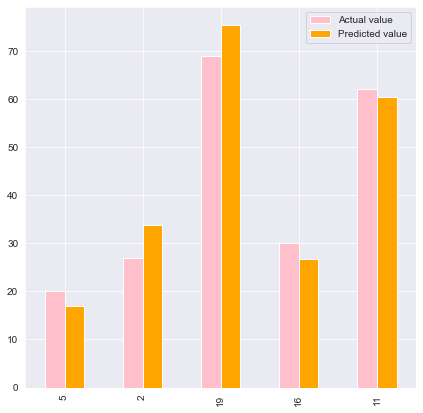

In [44]:
# Bar plot
df.plot(kind='bar',figsize=(7,7),color=('pink','orange'))
plt.show()

# Predicting Scores for 9.25 hours of study

In [46]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
pred = regression.predict([[9.5]])
print("NO. of hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

NO. of hours = 9.25
Predicted Score = 96.16939660753593


# Observation:
    1.For 9.25 hours of study the predicted percentage scores is 96.169

# Model Evaluation Metrics

In [48]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#Checking the efficiency of model
mean_squ_error = mean_squared_error(test_Y,Y_pred[:5])
mean_abs_error = mean_absolute_error(test_Y,Y_pred[:5])
print("Mean Squred Error:",mean_squ_error)
print("Mean absolute Error:",mean_abs_error)

Mean Squred Error: 21.5987693072174
Mean absolute Error: 4.183859899002975
